<a href="https://colab.research.google.com/github/ankita1200/Machine-Learning-Topics/blob/main/StrokeDatasetClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. df["col"] - pandas series
2. df[["col"]] - pandas dataframe
3. sklearn imputer takes a dataframe
- imputer = SimpleImputer(strategy="median")

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Observation
1. Categorical features - 7
2. Continuous features - 3
3. output - Binary 1/0
Classification Problem


Data Analysis

In [9]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
data.isna().sum() / len(data) * 100

,0
id,0.000000
gender,0.000000
age,0.000000
hypertension,0.000000
heart_disease,0.000000
ever_married,0.000000
work_type,0.000000
Residence_type,0.000000
avg_glucose_level,0.000000
bmi,3.933464


There are 201/ 3-percent of the records with BMI value missing. What to do about it.


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [18]:
# 5K instances indicates fairly small dataset by machine learning standards
data["smoking_status"].value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

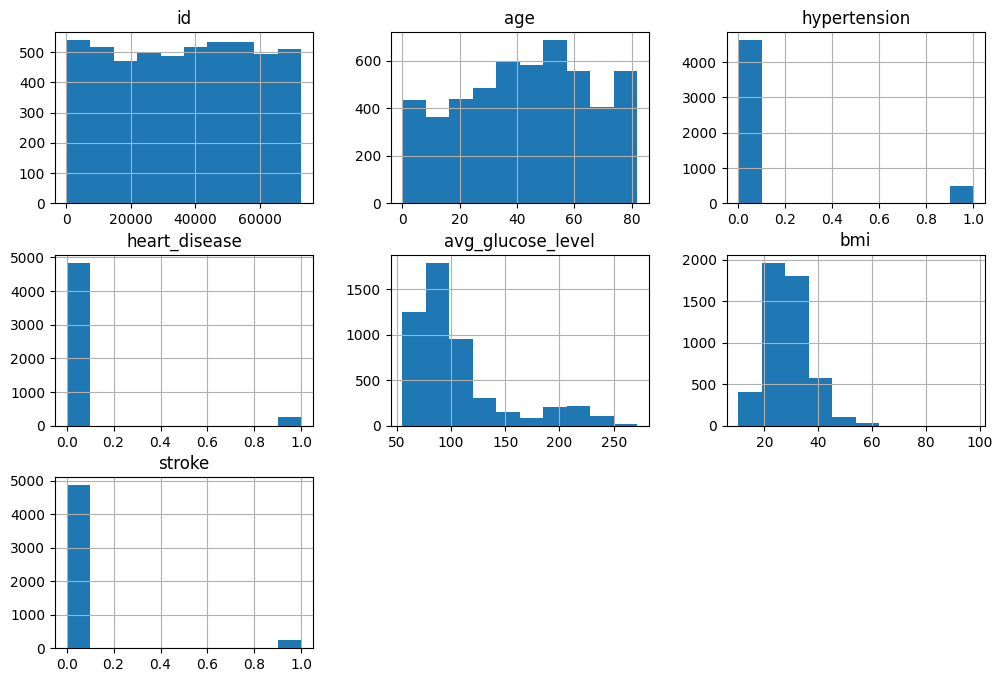

In [19]:
data.hist(figsize=(12,8))

In [65]:
train_set , test_set = train_test_split(data, test_size=0.2, random_state=42)

In [66]:
train_set.shape

(4088, 12)

array([[<Axes: xlabel='avg_glucose_level', ylabel='avg_glucose_level'>,
        <Axes: xlabel='bmi', ylabel='avg_glucose_level'>],
       [<Axes: xlabel='avg_glucose_level', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>]], dtype=object)

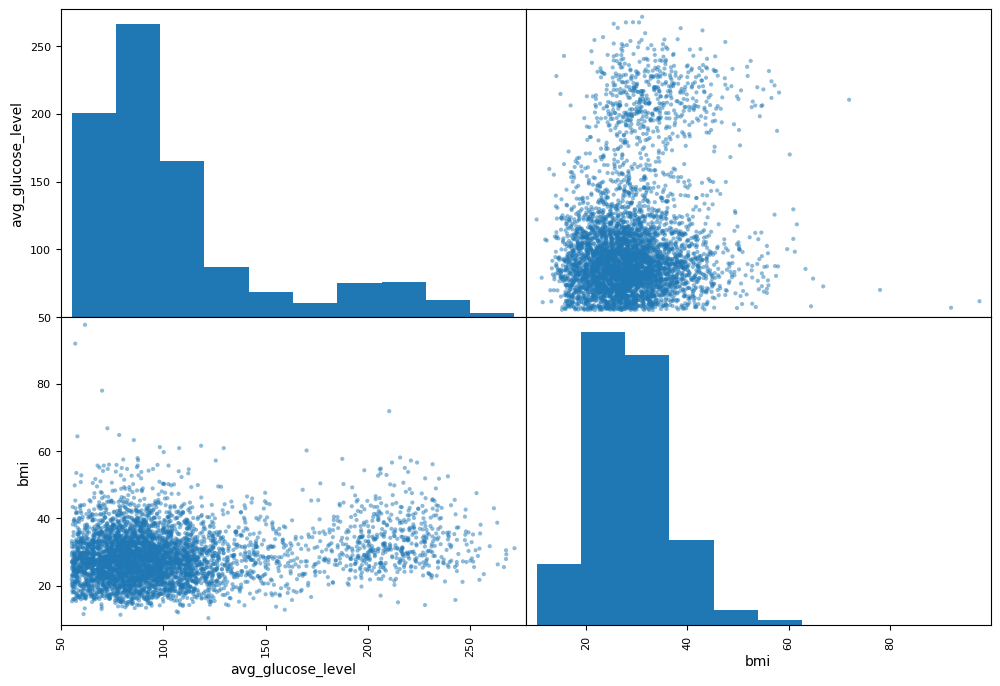

In [67]:
# explore correlations
attributes = ["avg_glucose_level", "bmi"]
scatter_matrix(data[attributes], figsize=(12,8))

In [68]:
imputer = SimpleImputer(strategy="median")
imputer.fit(train_set[["bmi"]])
train_set["bmi"] = imputer.transform(train_set[["bmi"]])
# next try knn-imputer

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
802,4970,Male,79.00,0,0,Yes,Self-employed,Rural,112.64,28.5,formerly smoked,0
3927,56137,Female,62.00,0,0,Yes,Private,Urban,88.32,36.3,Unknown,0
2337,54590,Female,21.00,0,0,No,Private,Rural,59.52,33.7,never smoked,0
3910,36548,Male,31.00,0,0,Yes,Govt_job,Urban,65.70,30.4,formerly smoked,0
1886,61171,Female,31.00,0,0,No,Private,Rural,59.63,19.9,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4426,13846,Male,43.00,0,0,Yes,Govt_job,Rural,88.00,30.6,never smoked,0
466,1307,Female,61.00,1,0,Yes,Private,Rural,170.05,60.2,smokes,0
3092,31481,Female,1.16,0,0,No,children,Urban,97.28,17.8,Unknown,0
3772,61827,Male,80.00,0,0,Yes,Self-employed,Rural,196.08,31.0,formerly smoked,0


Handling Categorical data

In [71]:
cat_encoder = OneHotEncoder()
train_set["gender"]  = cat_encoder.fit_transform(train_set[["gender"]]).toarray()
train_set["work_type"] = cat_encoder.fit_transform(train_set[["work_type"]]).toarray()
train_set["Residence_type"] = cat_encoder.fit_transform(train_set[["Residence_type"]]).toarray()
train_set["smoking_status"] = cat_encoder.fit_transform(train_set[["smoking_status"]]).toarray()
train_set["ever_married"] = cat_encoder.fit_transform(train_set[["ever_married"]]).toarray()
train_set.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
802,4970,0.0,79.0,0,0,0.0,0.0,1.0,112.64,28.5,0.0,0
3927,56137,1.0,62.0,0,0,0.0,0.0,0.0,88.32,36.3,1.0,0
2337,54590,1.0,21.0,0,0,1.0,0.0,1.0,59.52,33.7,0.0,0
3910,36548,0.0,31.0,0,0,0.0,1.0,0.0,65.70,30.4,0.0,0
1886,61171,1.0,31.0,0,0,1.0,0.0,1.0,59.63,19.9,0.0,0


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

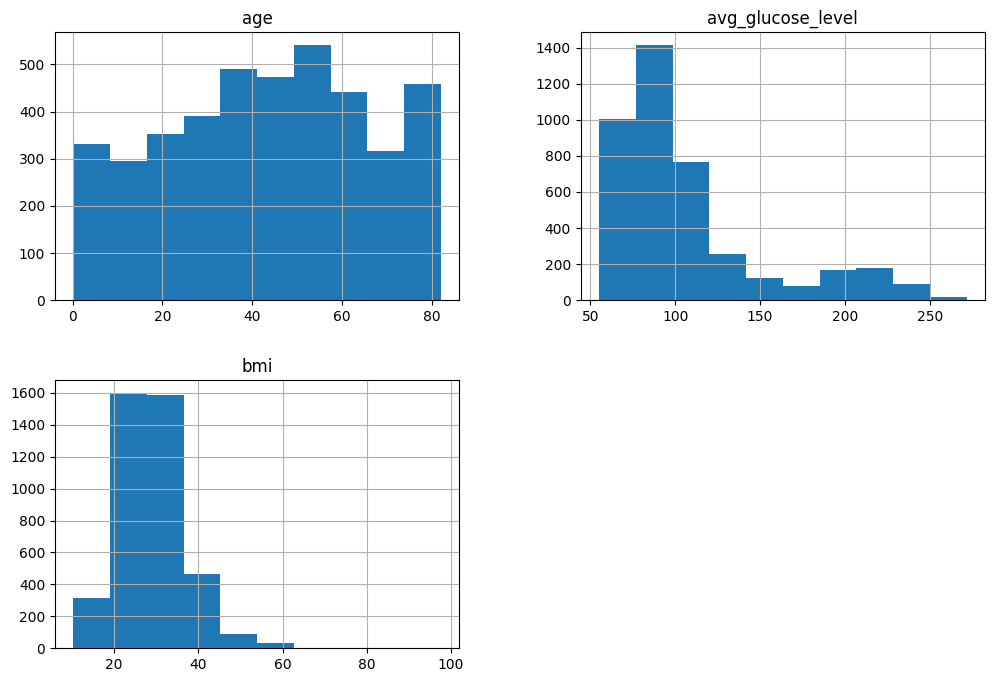

In [73]:
train_set[["age","avg_glucose_level","bmi"]].hist(figsize=(12,8))

**Feature 'avg_glucose_level' has a heavy tail. Before scaling we need to transform it to shrink the heavy tail**

In [74]:
# making the feature distribution Gaussian (normal/bell-shaped)
train_set["avg_glucose_level"] = np.log(train_set["avg_glucose_level"])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

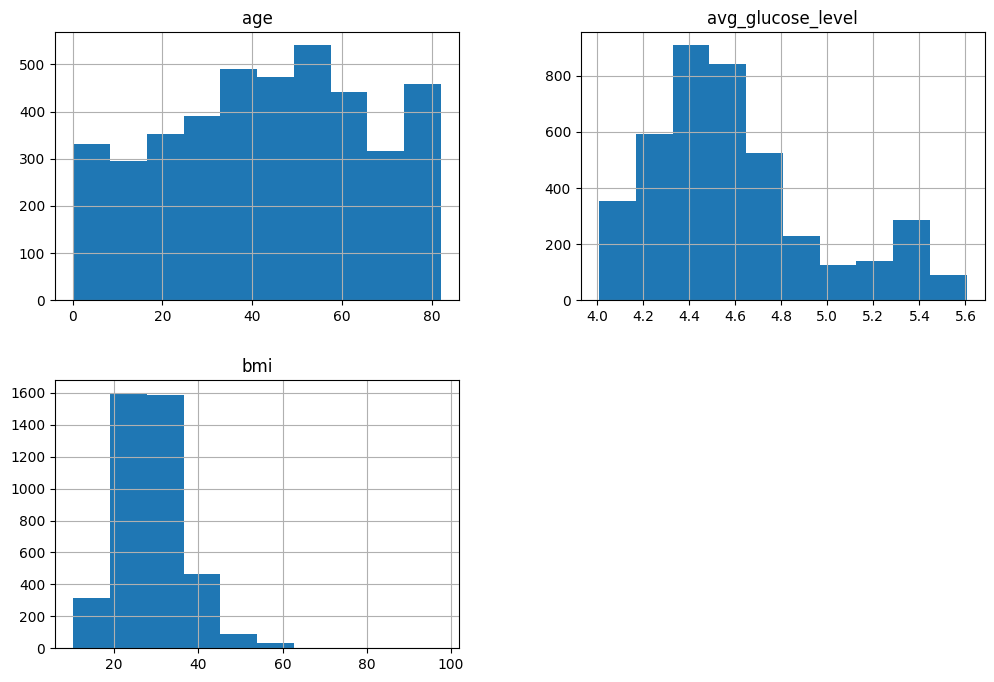

In [76]:
train_set[["age","avg_glucose_level","bmi"]].hist(figsize=(12,8))

In [77]:
from scipy.stats import skew, kurtosis
skewness = skew(train_set['age'])
kurt = kurtosis(train_set['age'])
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Skewness: -0.12485034175624134
Kurtosis: -0.9874717761775296


In [81]:
min_max_scaler = MinMaxScaler()
train_set[["age", "avg_glucose_level", "bmi"]] = min_max_scaler.fit_transform(train_set[["age", "avg_glucose_level", "bmi"]])

In [82]:
train_set.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
802,4970,0.0,0.963343,0,0,0.0,0.0,1.0,0.447984,0.208477,0.0,0
3927,56137,1.0,0.755621,0,0,0.0,0.0,0.0,0.295521,0.297824,1.0,0
2337,54590,1.0,0.254643,0,0,1.0,0.0,1.0,0.048140,0.268041,0.0,0
3910,36548,0.0,0.376833,0,0,0.0,1.0,0.0,0.110062,0.230241,0.0,0
1886,61171,1.0,0.376833,0,0,1.0,0.0,1.0,0.049298,0.109966,0.0,0


In [105]:
train_set_y = train_set["stroke"]
train_set_x = train_set.drop("stroke", axis=1)

In [84]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_set_x, train_set_y)

SGDClassifier(random_state=42)

In [103]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_set_x, train_set_y)
cross_val_score(sgd_clf,train_set_x, train_set_y, cv=3, scoring="accuracy")

array([0.95451211, 0.95377843, 0.95447871])

In [106]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_set_x, train_set_y)
train_pred = cross_val_predict(sgd_clf, train_set_x, train_set_y, cv=3)

In [107]:
cm = confusion_matrix(train_set_y, train_pred)

In [108]:
cm

array([[3901,    0],
       [ 187,    0]])

In [97]:
confusion_matrix(train_set_y, train_set_y)

array([[3901,    0],
       [   0,  187]])

In [99]:
precision_score(train_set_y, train_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.0

In [102]:
recall_score(train_set_y, train_pred)

0.0

**We see a high accuracy and low precsion,recall metric value for this classification model. This is a hint of class imbalance. Also from the data no of instances of stroke vs no of instances of no-stroke is 1:21. This is highly imbalance dataset. **